In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df= pd.read_csv('F:/credit/archive/advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.shape

(200, 4)

In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df.isnull().sum

<bound method DataFrame.sum of         TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]>

In [8]:
df.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool>

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
x= df[['TV','Radio','Newspaper']]
y=df['Sales']

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
r=LinearRegression()

In [13]:
r.fit(df[['TV','Radio','Newspaper']],df['Sales'])

LinearRegression()

In [14]:
r.intercept_

4.625124078808653

In [15]:
r.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [16]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=60)

In [17]:
r.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred=r.predict(x_test)

In [19]:
print(y_pred)

[14.86253567 20.71209333 11.50411103 21.30153573 21.24006953 20.9128905
 19.29855108 18.05566817 15.12820499  8.267163   11.27264507  7.35008557
 17.51542401  6.20767918 11.35760162 18.24877288 18.08778935 10.66059873
  8.13809106 11.88656912 24.50971973  8.46190316 14.79396758 17.13071653
 12.11917011 19.44224732 13.78999297 10.25602094  7.60305103  8.35786633
 13.93232255 19.25624785 15.61360351 20.16153728 21.01431065 17.89957036
 14.32171256  8.06280812 13.89103958 10.38308253]


In [20]:
k=r.predict([[232.2,8.6,8.7]])

C:\Users\sanjay\Desktop\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
print(k)

[18.23678729]


In [22]:
r.score(x,y)

0.9016883655508093

In [23]:
from sklearn.metrics import mean_squared_error, r2_score


print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.9331088069223817
Mean Squared Error: 2.1076812918019807


In [24]:
print(r.coef_)
print(r.intercept_)


[ 0.05332491  0.10413576 -0.00417651]
4.995511772358764


In [25]:
df.columns[:-1]  # ['TV', 'Radio', 'Newspaper']


Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [26]:
import numpy as np
r.predict(np.array([[200, 10, 20]]))


C:\Users\sanjay\Desktop\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.61832079])

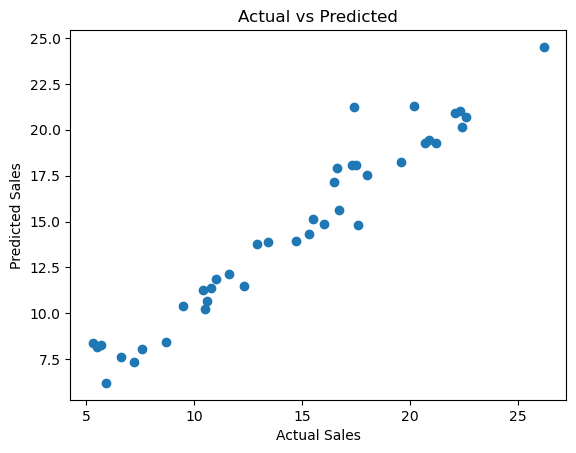

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted")
plt.show()


In [28]:
for feature, coef in zip(df.columns[:-1], r.coef_):
    print(f"{feature}: {coef}")


TV: 0.05332490781819259
Radio: 0.10413575984238238
Newspaper: -0.004176507024120479


In [29]:
import joblib
joblib.dump(r, 'sales_prediction_model.pkl')


['sales_prediction_model.pkl']

In [30]:
new_data = [[230, 37, 69]]  
predicted_sales = r.predict(new_data)
print("Predicted Sales:", predicted_sales[0])


Predicted Sales: 20.825084700046894


C:\Users\sanjay\Desktop\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
import os
print(os.getcwd())


C:\Users\sanjay


In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [33]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [35]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [36]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_model.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 1.1087261407741338
R2 Score: 0.9648125100122145


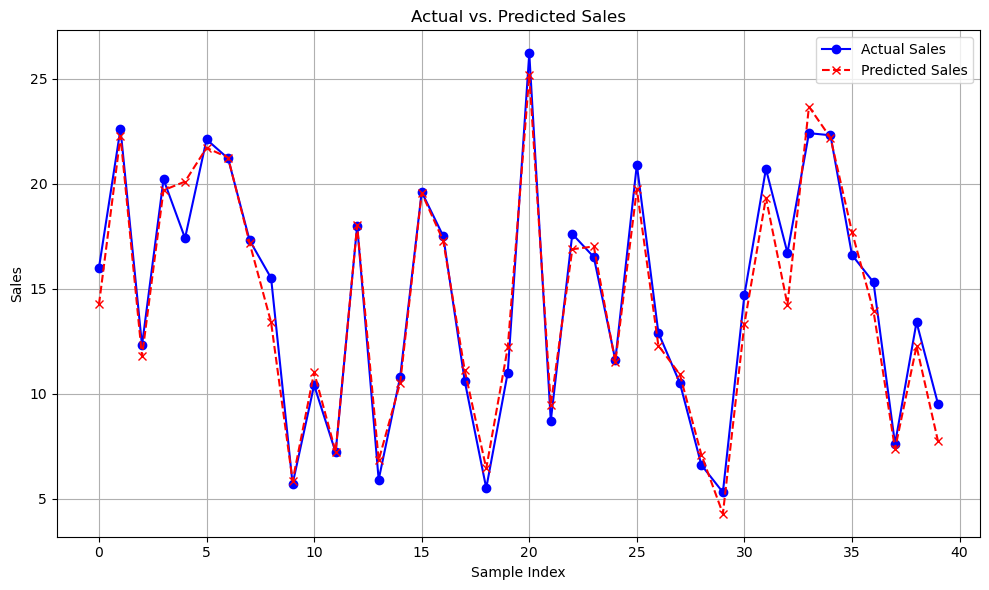

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(y_pred, label='Predicted Sales', color='red', linestyle='--', marker='x')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


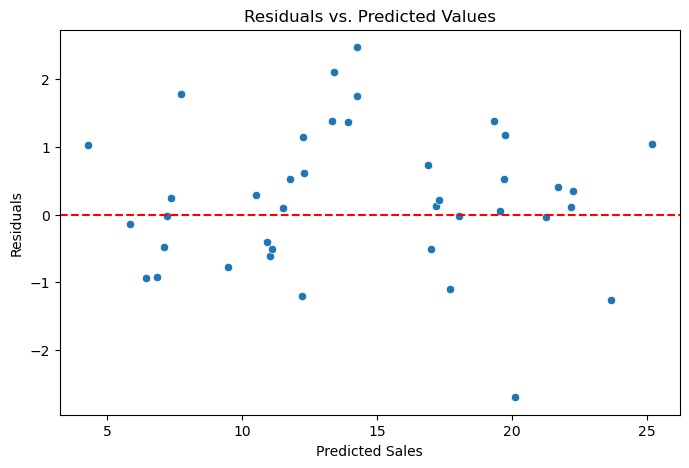

In [40]:
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()


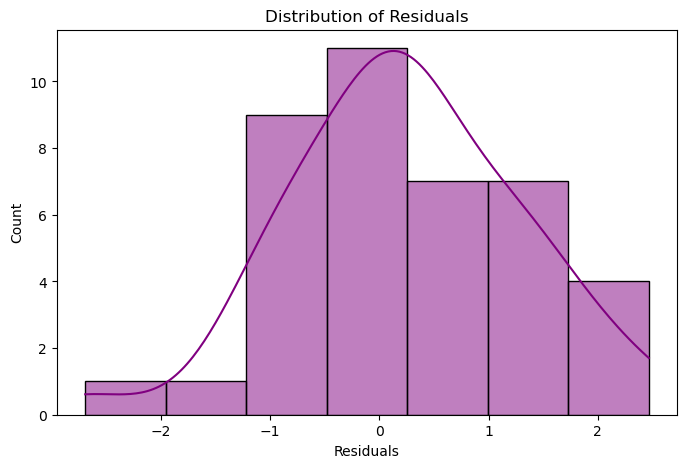

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()


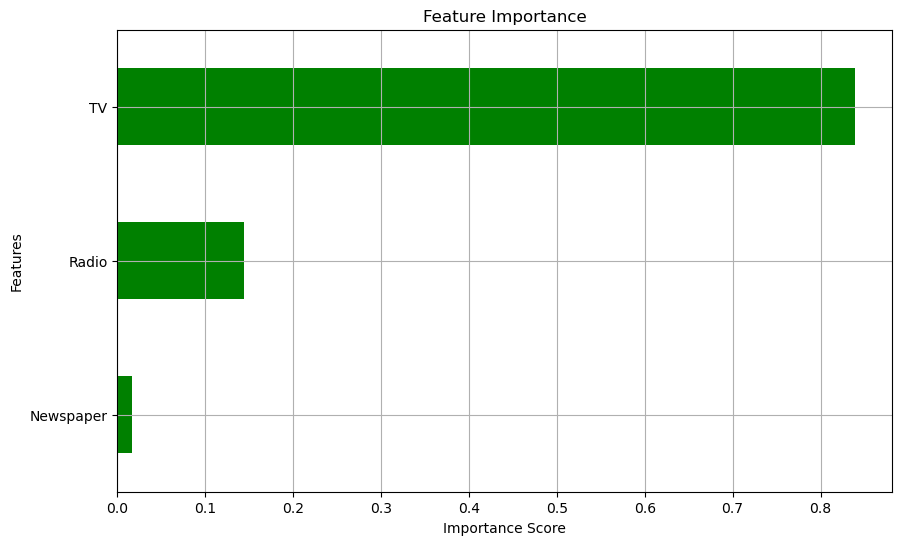

In [43]:
import pandas as pd

feature_importance = pd.Series(best_model.feature_importances_, index=x.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10,6), color='green')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.show()
